<a href="https://colab.research.google.com/github/SandeepH2706/IITM_MLT/blob/main/Week_10_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

We wil implement both hard-margin SVMs and soft-margin SVMs from scratch on a toy dataset. Apart from `NumPy`, we would need to take the help of `SciPy` for solving the quadratic programming problem.

## Hard-Margin SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1])

### Problem-1

$\mathbf{X}$ is a data-matrix of shape $(d, n)$. $\mathbf{y}$ is a vector of labels of size $(n, )$. What is the value of $n$ and $d$?

In [3]:
### Solution ###
print(f'The shape of X is: {X.shape}')
print(f'The shape of y is: {y.shape}')

d = X.shape[0]
n = X.shape[1]

print(f'd = {d}, n = {n}')

The shape of X is: (2, 20)
The shape of y is: (20,)
d = 2, n = 20


### Problem-2

Visualize the dataset given to you using a scatter plot. Colour points which belong to class $+1$ $\color{green}{\text{green}}$ and those that belong to $-1$ $\color{red}{\text{red}}$. Inspect the data visually and determine its linear separability.

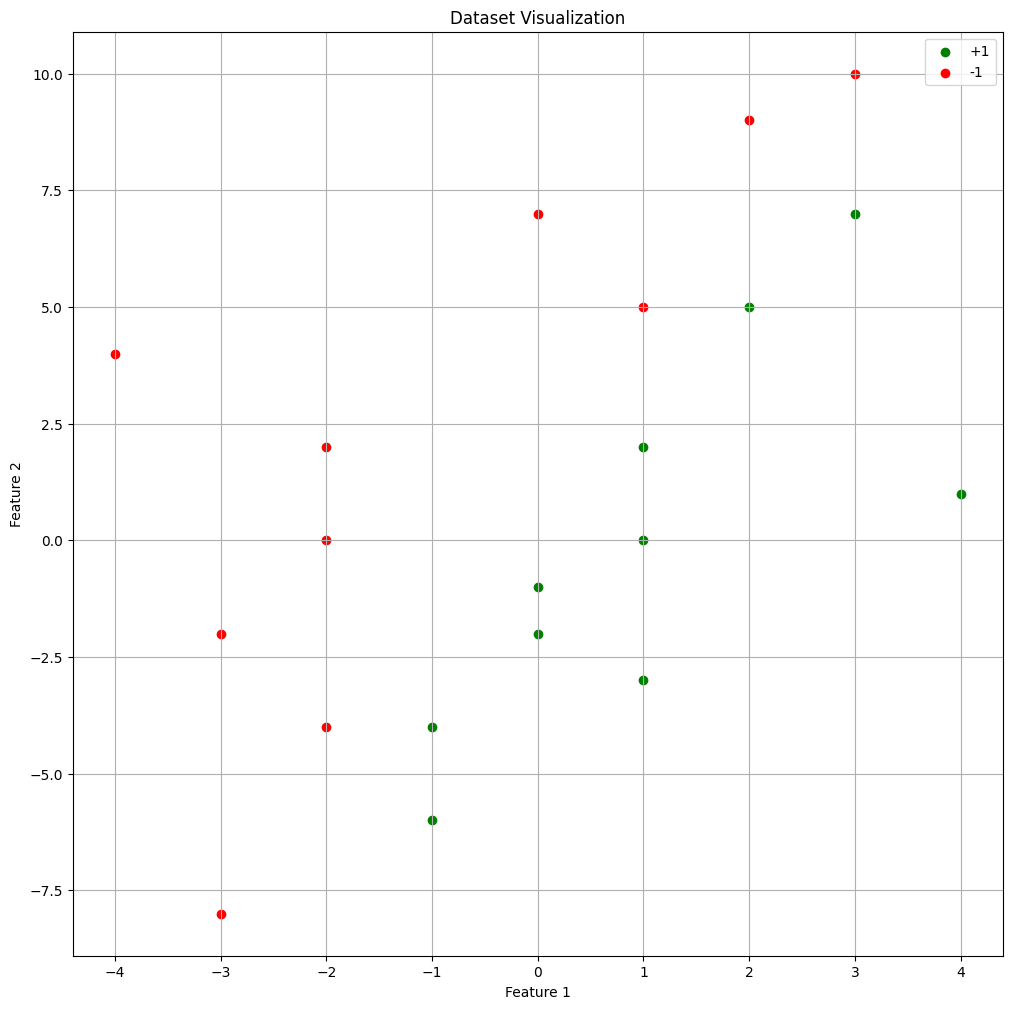

In [4]:
### Solution ###
# Separate points by class
X_class_1 = X[:, y == 1]
X_class_neg1 = X[:, y == -1]

# Plot the points
plt.scatter(X_class_1[0, :], X_class_1[1, :], color='green', label='+1')
plt.scatter(X_class_neg1[0, :], X_class_neg1[1, :], color='red', label='-1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Visualization')
plt.legend()
plt.grid(True)
plt.show()

### Problem-3

Compute the object $\mathbf{Y}$ that appears in the dual problem. What kind of an object is $\mathbf{Y}$?

In [5]:
### Solution ###
Y = np.diag(y)
print("Y is a diagonal matrix with the labels y on the diagonal.")

Y is a diagonal matrix with the labels y on the diagonal.


### Problem-4

Let $\boldsymbol{\alpha}$ be the dual variable. The dual objective is of the form:

$$
f(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \mathbf{1} - \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha}
$$



Compute the matrix $\mathbf{Q}$ for this problem and find the sum of its elements. What properties does the matrix $\mathbf{Q}$ have? What is the nature of the objective function?

In [7]:
### Solution ###
# Compute Q
Q = (X @ Y).T @ (X @ Y)

# Sum of elements of Q
sum_Q = np.sum(Q)
print(f"Sum of elements of Q: {sum_Q}")

# Properties of Q
print("\nProperties of Q:")
print(f"- Shape of Q: {Q.shape}")
print(f"- Is Q symmetric? {np.allclose(Q, Q.T)}")
eigenvalues = np.linalg.eigvals(Q)
print(f"- Eigenvalues of Q: {eigenvalues}")
print(f"- Is Q positive semi-definite? {np.all(eigenvalues >= -1e-8)}") # Allow for small floating point errors

# Nature of the objective function
print("\nNature of the objective function:")
print("The objective function is a quadratic function. Since Q is positive semi-definite, the objective function is concave.")

Sum of elements of Q: 976

Properties of Q:
- Shape of Q: (20, 20)
- Is Q symmetric? True
- Eigenvalues of Q: [ 5.34053185e+02+0.00000000e+00j  6.39468145e+01+0.00000000e+00j
 -1.66451162e-14+0.00000000e+00j  1.36104217e-14+0.00000000e+00j
  4.64357994e-15+0.00000000e+00j -4.13644462e-15+0.00000000e+00j
 -1.12999986e-15+2.77071265e-15j -1.12999986e-15-2.77071265e-15j
  1.02937541e-15+1.32024984e-15j  1.02937541e-15-1.32024984e-15j
 -1.11619828e-15+0.00000000e+00j  7.66411730e-16+2.74291875e-16j
  7.66411730e-16-2.74291875e-16j -1.25605337e-18+6.33218099e-16j
 -1.25605337e-18-6.33218099e-16j  4.81824527e-17+0.00000000e+00j
 -6.95521286e-17+4.04552905e-17j -6.95521286e-17-4.04552905e-17j
  1.03359528e-32+0.00000000e+00j -1.70522875e-31+0.00000000e+00j]
- Is Q positive semi-definite? True

Nature of the objective function:
The objective function is a quadratic function. Since Q is positive semi-definite, the objective function is concave.


### Problem-5

Since `SciPy`'s optimization routines take the form of minimizing a function, we will recast $f$ as follows:

$$
f(\boldsymbol{\alpha}) =  \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

We now have to solve :

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad f(\boldsymbol{\alpha})
$$

Note that $\max$ changes to $\min$ since we changed the sign of the objective function.

<hr>

Write a function `loss` that returns the value of objective function $f(\boldsymbol{\alpha})$ for argument $\boldsymbol{\alpha}$. Compute the value of `loss` at $\boldsymbol{\alpha} = \mathbf{1}$.

**Note**: The reason for naming the function `loss` is that we will be using `SciPy`'s `scipy.optimize.minize` routine.

In [8]:
### Solution ###
def loss(alpha, Q):
  """Computes the objective function for the dual SVM problem."""
  return 0.5 * alpha.T @ Q @ alpha - alpha.T @ np.ones_like(alpha)

# Compute loss at alpha = 1
alpha_one = np.ones(n)
loss_at_one = loss(alpha_one, Q)
print(f"Value of loss at alpha = 1: {loss_at_one}")

Value of loss at alpha = 1: 468.0


### Problem-6

Write a function named `jac` that computes the gradient, $\nabla f(\boldsymbol{\alpha})$, given $\boldsymbol{\alpha}$ as argument. Compute the value of `jac` at $\boldsymbol{\alpha} = \mathbf{1}$ and print the sum of the components of the gradient vector.

**Note**: `jac` stands for Jacobian. In our case, we don't have a vector valued function. So, this will just be the gradient.

In [10]:
### Solution ###
def jac(alpha, Q):
  """Computes the gradient of the objective function."""
  return Q @ alpha - np.ones_like(alpha)

# Compute jac at alpha = 1
alpha_one = np.ones(n)
jac_at_one = jac(alpha_one, Q)
sum_jac_at_one = np.sum(jac_at_one)
print(f"Sum of components of the gradient at alpha = 1: {sum_jac_at_one}")

Sum of components of the gradient at alpha = 1: 956.0


### Problem-7

Finally, we have most of the ingredients to solve the dual problem:

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

Go through this [document](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to understand how `scipy.optimize.minimize` works. Few pointers:

(1)  You should pass five arguments to `scipy.optimize.minimize`: `loss`, `jac`, `alpha_init`, `method`, `Bounds`

(2) Use the method `SLSQP`. You can treat this as a black-box.

(3) Set the initial value of `alpha_init` to zero.

(4) Use `scipy.optimize.Bounds` to trigger the $\boldsymbol{\alpha} \geq 0$ constraint.

Compute the sum of components of the optimal solution, $\boldsymbol{\alpha}^*$. Enter the nearest integer as your answer.

In [12]:
### Solution ###
from scipy.optimize import minimize, Bounds
# Initial guess for alpha
alpha_init = np.zeros(n)

# Bounds for alpha (alpha >= 0)
bounds = Bounds(0, np.inf)

# Solve the dual problem
result = minimize(loss, alpha_init, args=(Q,), method='SLSQP', jac=jac, bounds=bounds)

# Optimal alpha
alpha_star = result.x

# Sum of components of optimal alpha
sum_alpha_star = np.sum(alpha_star)

print(f"Sum of components of the optimal solution alpha*: {sum_alpha_star}")

Sum of components of the optimal solution alpha*: 9.999991235176815


### Problem-8

Find all the support vectors. Print the indices (zero-indexing) in the data-matrix where these support vectors are found.

In [14]:
### Solution ###
tolerance = 1e-5
support_vector_indices = np.where(alpha_star > tolerance)[0]

print(f"Indices of support vectors: {support_vector_indices}")

Indices of support vectors: [ 6  7  8  9 18 19]


### Problem-9

Find the optimal weight vector $\mathbf{w}^*$. Round each component of the optimal weight vector to the nearest integer.

In [15]:
### Solution ###
# Compute the optimal weight vector w*
# w* = sum(alpha_i * y_i * x_i)
w_star = np.sum(alpha_star * y * X, axis=1)

# Round components to the nearest integer
w_star_rounded = np.round(w_star).astype(int)

print(f"Optimal weight vector w*: {w_star}")
print(f"Optimal weight vector w* (rounded): {w_star_rounded}")

Optimal weight vector w*: [ 3.00000527 -0.99997543]
Optimal weight vector w* (rounded): [ 3 -1]


### Problem-10

Plot the decision boundary along with the supporting hyperplanes. Note where the support vectors lie in this plot. How many red points lie on the supporting hyperplanes? How many green points lie on the supporting hyperplanes?

Optimal bias term b*: -0.0001333977986108792


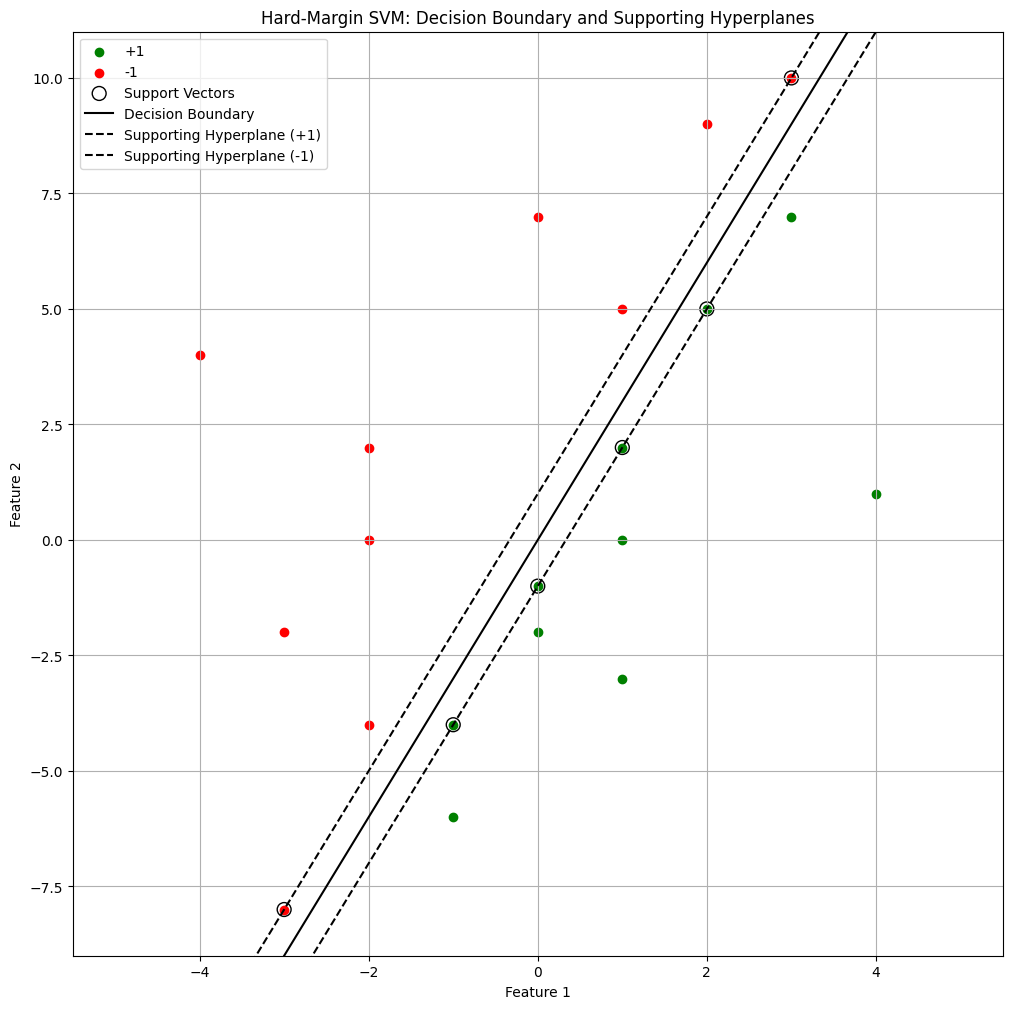


Number of red points on supporting hyperplanes: 0
Number of green points on supporting hyperplanes: 2


In [16]:
### Solution ###
first_sv_index = support_vector_indices[0]
x_sv = X[:, first_sv_index]
y_sv = y[first_sv_index]

b_star = 1/y_sv - w_star.T @ x_sv

print(f"Optimal bias term b*: {b_star}")

# Plot the data points
plt.scatter(X_class_1[0, :], X_class_1[1, :], color='green', label='+1')
plt.scatter(X_class_neg1[0, :], X_class_neg1[1, :], color='red', label='-1')

# Plot the support vectors
plt.scatter(X[0, support_vector_indices], X[1, support_vector_indices],
            facecolors='none', edgecolors='black', s=100, label='Support Vectors')


# Plot the decision boundary (w*.T @ x + b* = 0)
x_vals = np.linspace(X[0, :].min() - 1, X[0, :].max() + 1, 100)
y_vals_decision_boundary = (-w_star[0] * x_vals - b_star) / w_star[1]
plt.plot(x_vals, y_vals_decision_boundary, 'k-', label='Decision Boundary')

# Plot the supporting hyperplanes (w*.T @ x + b* = 1 and w*.T @ x + b* = -1)
y_vals_hp1 = (-w_star[0] * x_vals - b_star + 1) / w_star[1]
y_vals_hp2 = (-w_star[0] * x_vals - b_star - 1) / w_star[1]
plt.plot(x_vals, y_vals_hp1, 'k--', label='Supporting Hyperplane (+1)')
plt.plot(x_vals, y_vals_hp2, 'k--', label='Supporting Hyperplane (-1)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard-Margin SVM: Decision Boundary and Supporting Hyperplanes')
plt.legend()
plt.grid(True)
plt.ylim([X[1,:].min() - 1, X[1,:].max() + 1])
plt.show()

# Count points on supporting hyperplanes
# A point x_i is on a supporting hyperplane if y_i * (w*.T @ x_i + b*) is close to 1
values_on_hyperplanes = y * (w_star.T @ X + b_star)
points_on_hyperplanes_indices = np.where(np.isclose(np.abs(values_on_hyperplanes), 1, atol=1e-4))[0]

red_points_on_hyperplanes = np.sum(y[points_on_hyperplanes_indices] == -1)
green_points_on_hyperplanes = np.sum(y[points_on_hyperplanes_indices] == 1)

print(f"\nNumber of red points on supporting hyperplanes: {red_points_on_hyperplanes}")
print(f"Number of green points on supporting hyperplanes: {green_points_on_hyperplanes}")

## Soft-margin SVM

We now turn to soft-margin SVMs. Adapt the hard-margin code that you have written for the soft-margin problem. The only change you have to make is to introduce an upper bound for $\boldsymbol{\alpha}$, which is the hyperparameter $C$.


In [17]:
### Solution ###
from scipy.optimize import minimize, Bounds

# Define the hyperparameter C
C = 1.0 # You can change this value for different problems

# Initial guess for alpha
alpha_init = np.zeros(n)

# Bounds for alpha (0 <= alpha <= C)
bounds = Bounds(0, C)

# Solve the soft-margin dual problem
result_soft = minimize(loss, alpha_init, args=(Q,), method='SLSQP', jac=jac, bounds=bounds)

# Optimal alpha for soft-margin SVM
alpha_star_soft = result_soft.x

print("Soft-margin SVM optimization complete.")

Soft-margin SVM optimization complete.


### Problem-11

Plot the decision boundary and the supporting hyperplane for the following values of $C$.

(1) $C = 0.01$

(2) $C = 0.1$

(3) $C = 1$

(4) $C = 10$

Plot all of them in a $2 \times 2$ subplot. Study the tradeoff between the following quantities:

(1) Width of the margin.

(2) Number of points that lie within the margin or on the wrong side. This is often called **margin violation**.


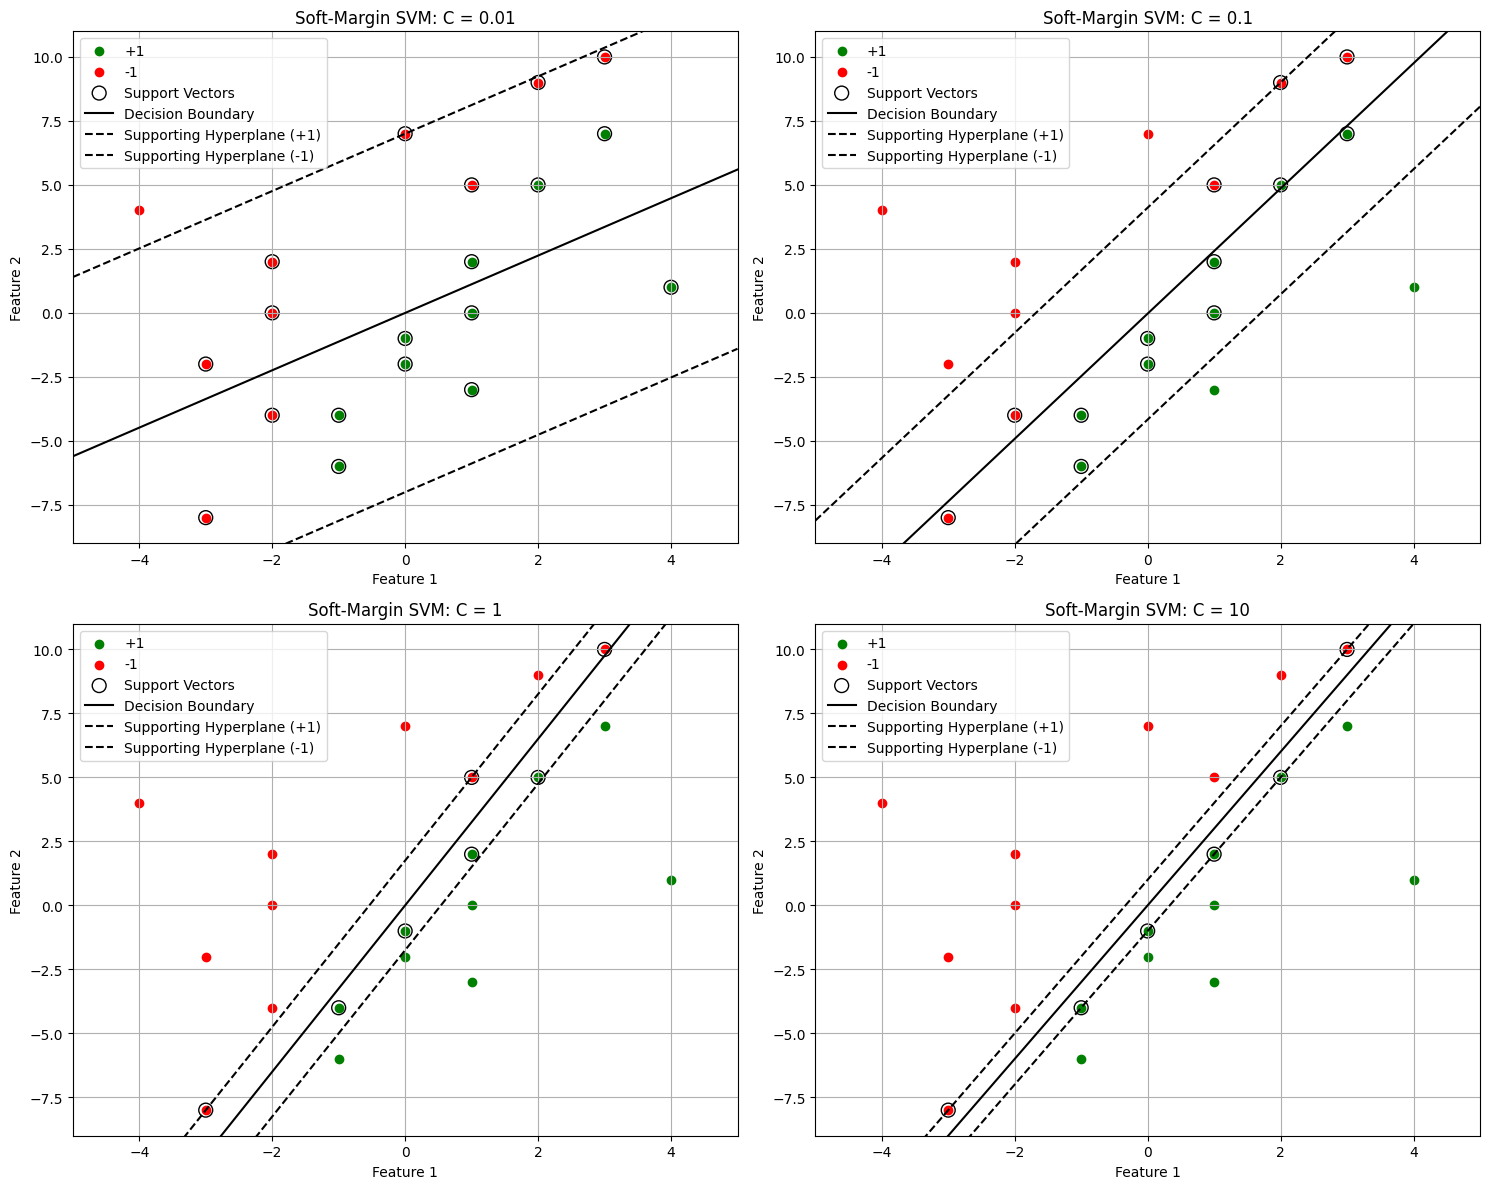

In [18]:
### Solution ###
### Solution ###
C_values = [0.01, 0.1, 1, 10]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, C in enumerate(C_values):
    # Solve the soft-margin dual problem for the current C
    bounds = Bounds(0, C)
    result_soft = minimize(loss, alpha_init, args=(Q,), method='SLSQP', jac=jac, bounds=bounds)
    alpha_star_soft = result_soft.x

    # Compute the optimal weight vector w*
    w_star_soft = np.sum(alpha_star_soft * y * X, axis=1)


    support_vector_indices_soft = np.where(alpha_star_soft > tolerance)[0]
    b_star_soft = np.mean([1/y[j] - w_star_soft.T @ X[:, j] for j in support_vector_indices_soft if alpha_star_soft[j] < C - tolerance and alpha_star_soft[j] > tolerance])
    if np.isnan(b_star_soft): # If no 0 < alpha_i < C support vectors found
        b_star_soft = np.mean([1/y[j] - w_star_soft.T @ X[:, j] for j in support_vector_indices_soft if alpha_star_soft[j] > tolerance])


    ax = axes[i]
    # Plot the data points
    ax.scatter(X_class_1[0, :], X_class_1[1, :], color='green', label='+1')
    ax.scatter(X_class_neg1[0, :], X_class_neg1[1, :], color='red', label='-1')

    # Plot the support vectors
    ax.scatter(X[0, support_vector_indices_soft], X[1, support_vector_indices_soft],
               facecolors='none', edgecolors='black', s=100, label='Support Vectors')

    # Plot the decision boundary (w*.T @ x + b* = 0)
    x_vals = np.linspace(X[0, :].min() - 1, X[0, :].max() + 1, 100)
    y_vals_decision_boundary = (-w_star_soft[0] * x_vals - b_star_soft) / w_star_soft[1]
    ax.plot(x_vals, y_vals_decision_boundary, 'k-', label='Decision Boundary')

    # Plot the supporting hyperplanes (w*.T @ x + b* = 1 and w*.T @ x + b* = -1)
    y_vals_hp1 = (-w_star_soft[0] * x_vals - b_star_soft + 1) / w_star_soft[1]
    y_vals_hp2 = (-w_star_soft[0] * x_vals - b_star_soft - 1) / w_star_soft[1]
    ax.plot(x_vals, y_vals_hp1, 'k--', label='Supporting Hyperplane (+1)')
    ax.plot(x_vals, y_vals_hp2, 'k--', label='Supporting Hyperplane (-1)')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'Soft-Margin SVM: C = {C}')
    ax.legend()
    ax.grid(True)
    ax.set_ylim([X[1,:].min() - 1, X[1,:].max() + 1])
    ax.set_xlim([X[0,:].min() - 1, X[0,:].max() + 1])


plt.tight_layout()
plt.show()

### Problem-12

For $C = 10$, how many support vectors does the model have? Observe where these points lie. Does this observation tally with your understanding of the last few minutes of the soft-SVM lecture where professor summarizes the relationship between $\alpha^{*}$ and the supporting hyperplanes?

In [19]:
### Solution ###

C_for_analysis = 10.0
bounds = Bounds(0, C_for_analysis)
result_soft_C10 = minimize(loss, alpha_init, args=(Q,), method='SLSQP', jac=jac, bounds=bounds)
alpha_star_soft_C10 = result_soft_C10.x

# Find support vectors for C=10
tolerance = 1e-5
support_vector_indices_C10 = np.where(alpha_star_soft_C10 > tolerance)[0]

print(f"Number of support vectors for C = {C_for_analysis}: {len(support_vector_indices_C10)}")
print(f"Indices of support vectors for C = {C_for_analysis}: {support_vector_indices_C10}")


Number of support vectors for C = 10.0: 6
Indices of support vectors for C = 10.0: [ 6  7  8  9 18 19]


### Problem-13

For $C = 10$, find the most critical support vectors, that is, those points for which $\alpha^{*}_i = C$.

In [20]:
### Solution ###
C_value = 10.0
critical_support_vector_indices = np.where(np.isclose(alpha_star_soft_C10, C_value, atol=tolerance))[0]

print(f"Indices of critical support vectors (alpha* = C) for C = {C_value}: {critical_support_vector_indices}")

Indices of critical support vectors (alpha* = C) for C = 10.0: []
